In [10]:
# prompt: read and plot a sound file

#!pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

# Load the audio file (update 'audio_file_path' with your audio file path)
# Upload an audio file
from google.colab import files
uploaded = files.upload()

audio_file_path = list(uploaded.keys())[0]

# Read the audio file
audio, sr = librosa.load(audio_file_path, sr=None, mono=False)  # mono=False to keep stereo



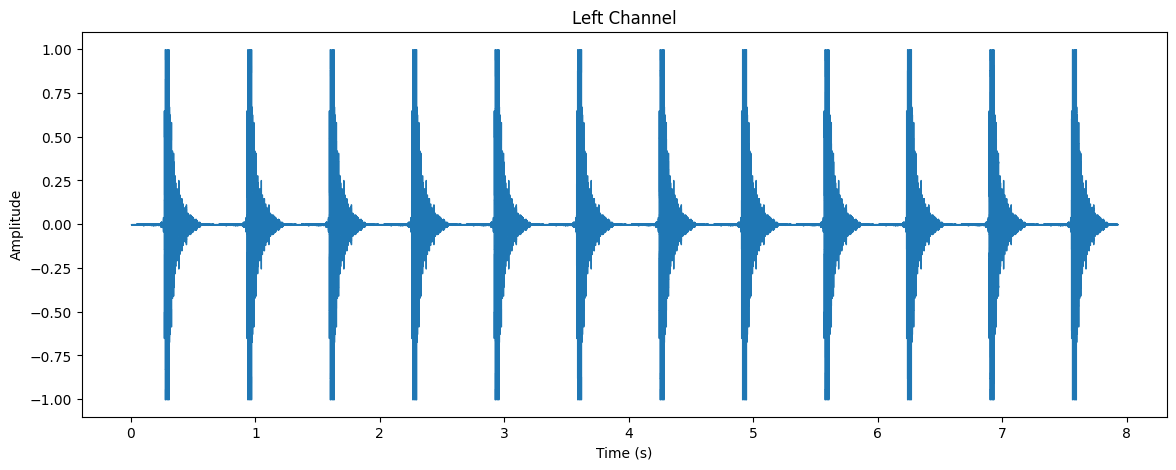

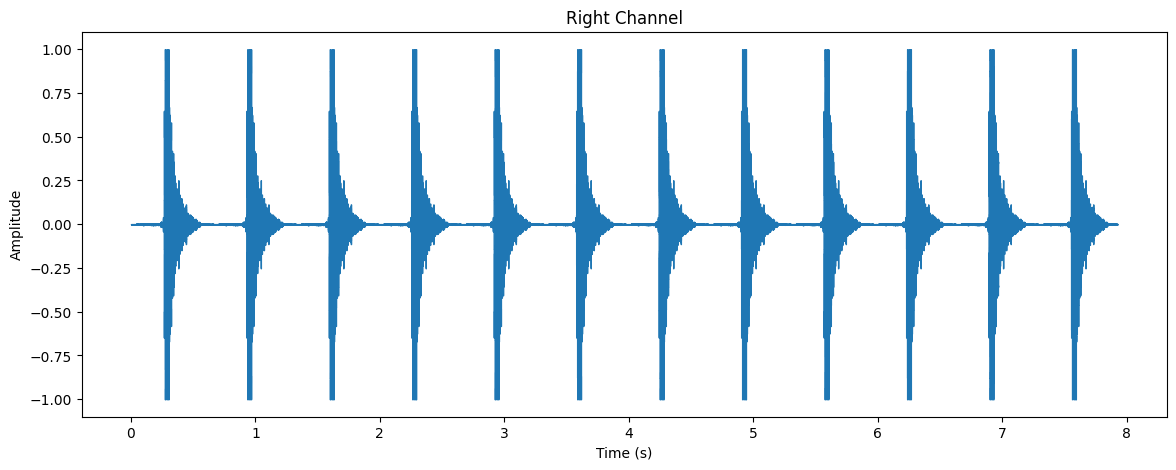

In [11]:


# Split into left and right channels
left_channel = audio[0]  # First row is the left channel
right_channel = audio[1]  # Second row is the right channel

# Plot the left channel
plt.figure(figsize=(14, 5))
librosa.display.waveshow(left_channel, sr=sr)
plt.title('Left Channel')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the right channel
plt.figure(figsize=(14, 5))
librosa.display.waveshow(right_channel, sr=sr)
plt.title('Right Channel')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [12]:
print("Type:", type(left_channel))        # Data type of left_channel
print("Shape:", left_channel.shape)       # Shape (number of samples)
print("Size:", left_channel.size)         # Total number of elements
print("Data type:", left_channel.dtype)   # Data type of each element
print("Sample rate:", sr)                 # Sampling rate (from the audio file)
print("Duration (seconds):", left_channel.size / sr)  # Duration in seconds

Type: <class 'numpy.ndarray'>
Shape: (349558,)
Size: 349558
Data type: float32
Sample rate: 44100
Duration (seconds): 7.926485260770975


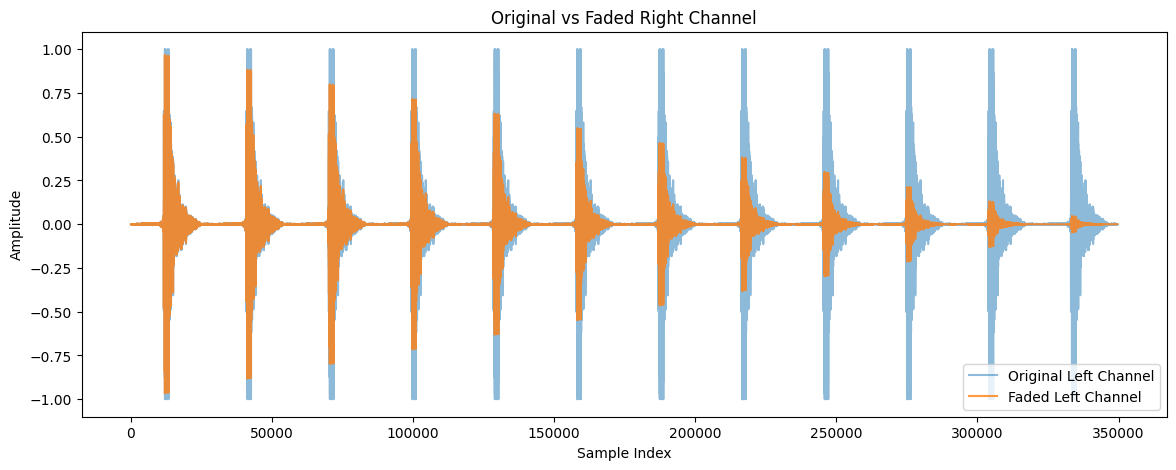

In [14]:
# Create a linear fade-in from 0 to 1
num_samples = len(left_channel)
fade_in = np.linspace(0, 1, num_samples)  # Linearly spaced array from 0 to 1
fade_out = np.linspace(1, 0, num_samples)  # Linearly spaced array from 0 to 1
# Apply the fade-in effect to the left channel
left_channel_faded = left_channel * fade_in
right_channel_faded = right_channel * fade_out

# Plot the original and modified left channel
plt.figure(figsize=(14, 5))
plt.plot(left_channel, alpha=0.5, label="Original Left Channel")
plt.plot(left_channel_faded, alpha=0.8, label="Faded Left Channel")
plt.title('Original vs Faded Left Channel')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot the original and modified right channel
plt.figure(figsize=(14, 5))
plt.plot(right_channel, alpha=0.5, label="Original Left Channel")
plt.plot(right_channel_faded, alpha=0.8, label="Faded Left Channel")
plt.title('Original vs Faded Right Channel')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



In [16]:
# Recombine the channels into stereo audio
modified_audio = np.vstack((left_channel_faded, right_channel_faded))

# Play the modified audio
Audio(modified_audio, rate=sr)

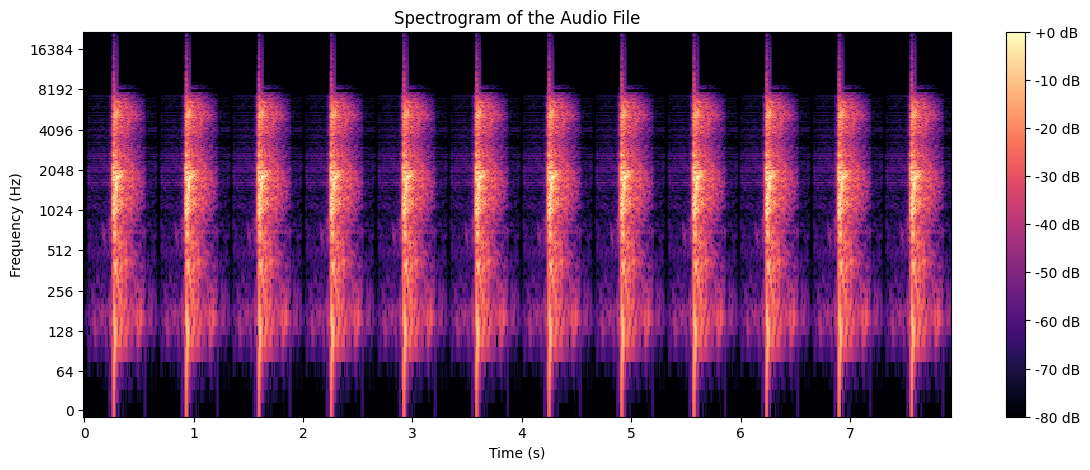

In [8]:
# Plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()



In [9]:
# Play the audio file
Audio(audio_file_path)